In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import time
import datetime
from datetime import date
%matplotlib inline
import mplfinance as mpf

In [2]:
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}

In [3]:
today = datetime.datetime.now().replace(hour=11, minute=0, second=0, microsecond=0)
one_year = today  - datetime.timedelta(days=8000)
period1 = int(time.mktime(one_year.timetuple()))
period2 = int(time.mktime(today.timetuple()))


In [4]:
def soup(symbol):
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true'
    response = requests.get(url, headers=headers)
    print(response)
    df_symbol = pd.read_csv(url)
    df_symbol.set_index('Date',inplace=True)
    dates = list(range(0,int(len(df_symbol))))
    if df_symbol.isnull().sum().sum() == 0:
        return df_symbol
       
    
symbol = 'AAPL'
df = soup(symbol)
df

<Response [200]>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-08-08,0.343929,0.351786,0.331071,0.337500,0.286856,276169600
2001-08-09,0.338571,0.341964,0.334286,0.340179,0.289133,200664800
2001-08-10,0.340000,0.345000,0.331964,0.339643,0.288677,186961600
2001-08-13,0.341071,0.345179,0.335000,0.340893,0.289740,147996800
2001-08-14,0.342857,0.345714,0.333393,0.334464,0.284275,228950400
...,...,...,...,...,...,...
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300


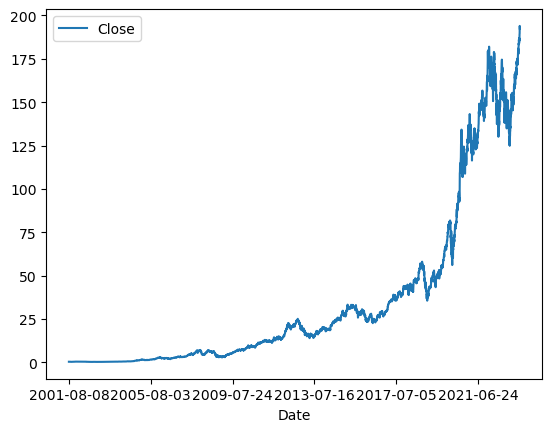

In [5]:
def plot_graph(df):
    df.plot.line(y="Close", use_index=True)

plot_graph(df)

In [6]:
df["Tomorrow"] = df["Close"].shift(-1)
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2001-08-08,0.343929,0.351786,0.331071,0.337500,0.286856,276169600,0.340179
2001-08-09,0.338571,0.341964,0.334286,0.340179,0.289133,200664800,0.339643
2001-08-10,0.340000,0.345000,0.331964,0.339643,0.288677,186961600,0.340893
2001-08-13,0.341071,0.345179,0.335000,0.340893,0.289740,147996800,0.334464
2001-08-14,0.342857,0.345714,0.333393,0.334464,0.284275,228950400,0.329286
...,...,...,...,...,...,...,...
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800,189.250000
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800,189.589996
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300,193.970001


In [7]:
df["Target"] = (df["Tomorrow"]>df["Close"]).astype(int)
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2001-08-08,0.343929,0.351786,0.331071,0.337500,0.286856,276169600,0.340179,1
2001-08-09,0.338571,0.341964,0.334286,0.340179,0.289133,200664800,0.339643,0
2001-08-10,0.340000,0.345000,0.331964,0.339643,0.288677,186961600,0.340893,1
2001-08-13,0.341071,0.345179,0.335000,0.340893,0.289740,147996800,0.334464,0
2001-08-14,0.342857,0.345714,0.333393,0.334464,0.284275,228950400,0.329286,0
...,...,...,...,...,...,...,...,...
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800,189.250000,1
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800,189.589996,1
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300,193.970001,1


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 250, min_samples_split = 100, random_state=1)
train = df.iloc[:-100]
test = df.iloc[-100:]
predictors=["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=250, random_state=1)

In [9]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index, name="Predicted-target")
preds.info()

<class 'pandas.core.series.Series'>
Index: 100 entries, 2023-02-08 to 2023-07-03
Series name: Predicted-target
Non-Null Count  Dtype
--------------  -----
100 non-null    int32
dtypes: int32(1)
memory usage: 1.2+ KB


In [10]:
check = pd.concat([test["Target"], preds], axis=1)
check

,Target,Predicted-target
Date,,
2023-02-08,0,0
2023-02-09,1,1
2023-02-10,1,0
2023-02-13,0,1
2023-02-14,1,1
...,...,...
2023-06-27,1,0
2023-06-28,1,0
2023-06-29,1,0


In [11]:
precision_score(test["Target"], preds)

0.5833333333333334

<AxesSubplot:xlabel='Date'>

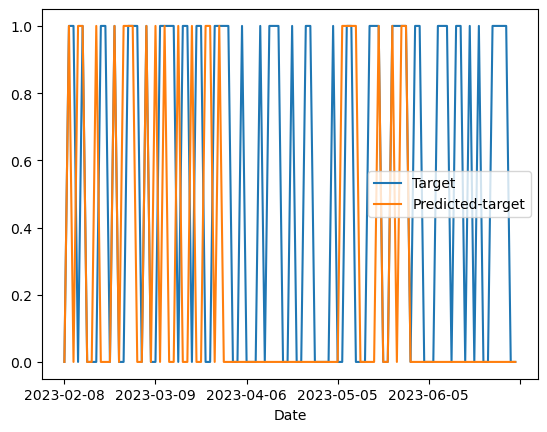

In [12]:
check.plot()

In [13]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predicted-target")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [14]:
df.shape[0]

5509

In [15]:
def backtest(df, model, predictors, start=2300, incr=230):
    complete_preds=[]
    
    for i in range(start, df.shape[0], incr):
        train = df.iloc[0:i].copy()
        test = df.iloc[i:(i+incr)].copy()
        predictions = predict(train, test, predictors, model)
        complete_preds.append(predictions)
        
    return pd.concat(complete_preds)

In [16]:
predictions = backtest(df, model, predictors)
predictions

,Target,Predicted-target
Date,,
2010-10-01,0,0
2010-10-04,1,1
2010-10-05,1,0
2010-10-06,1,0
2010-10-07,1,0
...,...,...
2023-06-27,1,0
2023-06-28,1,0
2023-06-29,1,0


In [17]:
predictions["Predicted-target"].value_counts()

0    1824
1    1385
Name: Predicted-target, dtype: int64

In [18]:
precision_score(predictions["Target"], predictions["Predicted-target"] )

0.5155234657039711

In [19]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.524774
0    0.475226
Name: Target, dtype: float64

In [20]:
bi =df.rolling(2).mean()
weekly = df.rolling(5).mean()
quarterly = df.rolling(90).mean()

df["Bi_mean"] = bi["Close"]/df["Close"]
df["weekly_mean"] = weekly["Close"]/df["Close"]
df["quarterly_mean"] = quarterly["Close"]/df["Close"]
df["open_close_ratio"] = df["Open"] / df["Close"]
df["high_close_ratio"] = df["High"] / df["Close"]
df["low_close_ratio"] = df["Low"] / df["Close"]


In [21]:
new_predictors = ["Bi_mean","weekly_mean","quarterly_mean", "open_close_ratio", "high_close_ratio",  "low_close_ratio"  ]

In [22]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Bi_mean,weekly_mean,quarterly_mean,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,
2001-08-08,0.343929,0.351786,0.331071,0.337500,0.286856,276169600,0.340179,1,NaN,NaN,NaN,1.019049,1.042329,0.980951
2001-08-09,0.338571,0.341964,0.334286,0.340179,0.289133,200664800,0.339643,0,0.996062,NaN,NaN,0.995273,1.005247,0.982677
2001-08-10,0.340000,0.345000,0.331964,0.339643,0.288677,186961600,0.340893,1,1.000789,NaN,NaN,1.001051,1.015772,0.977391
2001-08-13,0.341071,0.345179,0.335000,0.340893,0.289740,147996800,0.334464,0,0.998167,NaN,NaN,1.000522,1.012573,0.982713
2001-08-14,0.342857,0.345714,0.333393,0.334464,0.284275,228950400,0.329286,0,1.009611,1.012174,NaN,1.025094,1.033636,0.996798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800,189.250000,1,0.992582,0.990078,0.885651,0.988461,1.001755,0.987291
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800,189.589996,1,0.996856,0.989443,0.882168,0.993025,1.003435,0.991281
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300,193.970001,1,0.999103,0.990400,0.882757,0.997310,1.002532,0.996572


In [23]:
df=df.dropna()

In [24]:
new_predictors

['Bi_mean',
 'weekly_mean',
 'quarterly_mean',
 'open_close_ratio',
 'high_close_ratio',
 'low_close_ratio']

In [25]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

In [26]:
model

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [28]:
predictions = backtest(df, model, new_predictors)

In [29]:
predictions["Predictions"].value_counts()

0.0    2759
1.0     360
Name: Predictions, dtype: int64

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5277777777777778

In [31]:
predictions

,Target,Predictions
Date,,
2011-02-08,1,0.0
2011-02-09,0,1.0
2011-02-10,1,0.0
2011-02-11,1,0.0
2011-02-14,1,1.0
...,...,...
2023-06-26,1,0.0
2023-06-27,1,0.0
2023-06-28,1,0.0
